In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### Задача №1 
Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [146]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [147]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [148]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [149]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [150]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [151]:
W = np.random.randn(X.shape[1])
W

array([ 0.31875656,  0.05407112,  0.49341864, -0.79022467])

In [152]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        #if i % (iterations / 10) == 0:
        #    print(f'Iter: {i}, weights: {W}, error {err}')
    
    #print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

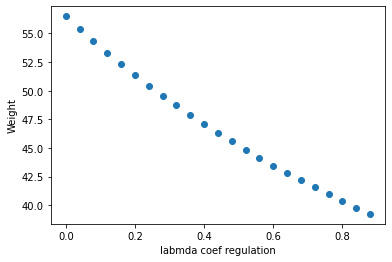

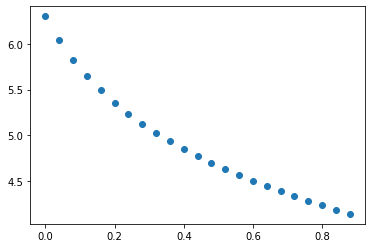

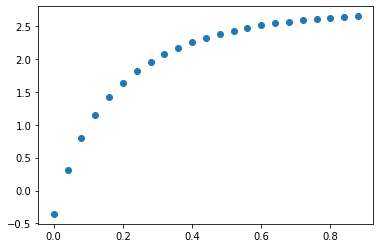

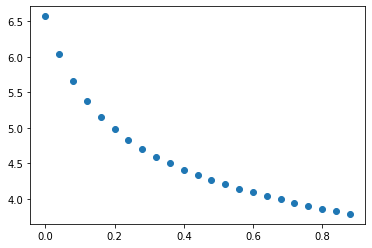

In [153]:
w1_for_plot = []
w2_for_plot = []
w3_for_plot = []
w4_for_plot = []
reg_for_plot = []

for i in np.arange(0, 0.9, 0.04):
    w_for_plot = (gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=i))
    w1_for_plot.append(w_for_plot[0])
    w2_for_plot.append(w_for_plot[1])
    w3_for_plot.append(w_for_plot[2])
    w4_for_plot.append(w_for_plot[3])
    
    reg_for_plot.append(i)


plt.gca().update(dict(xlabel='labmda coef regulation', ylabel='Weight'))
plt.scatter(reg_for_plot, w1_for_plot)
plt.show()
plt.scatter(reg_for_plot, w2_for_plot)
plt.show()
plt.scatter(reg_for_plot, w3_for_plot)
plt.show()
plt.scatter(reg_for_plot, w4_for_plot)
plt.show()


#### Вывод:
При увеличении коеффициента регуляции мы "штрафуем" модель за большие веса и тем самым она снижает их.


### Задача 2
Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [154]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [155]:
#Поменяем расчет ошибки с квадрата на модуль
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mae(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MAE: {calc_mae(y, np.dot(X, W))}')
    return W

In [156]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-1)

Iter: 0, weights: [ 1.84760425  0.364321   -0.03661507 -0.75275605], error 55.767002812670924
Iter: 500, weights: [53.80824434  5.57020977  1.65660785  4.98067109], error 4.856077610454865
Iter: 1000, weights: [53.80952378  5.69982115  1.12908601  5.39670344], error 4.863061738630388
Iter: 1500, weights: [53.80952381  5.72401058  1.01534509  5.48998492], error 4.865437304075487
Iter: 2000, weights: [53.80952381  5.72915886  0.99058485  5.51040332], error 4.865976362521424
Iter: 2500, weights: [53.80952381  5.73027748  0.98518741  5.51485776], error 4.866094550004834
Iter: 3000, weights: [53.80952381  5.73052126  0.9840106   5.51582907], error 4.866120339506573
Iter: 3500, weights: [53.80952381  5.73057441  0.98375401  5.51604085], error 4.866125963212639
Iter: 4000, weights: [53.80952381  5.730586    0.98369807  5.51608703], error 4.8661271894114675
Iter: 4500, weights: [53.80952381  5.73058853  0.98368587  5.5160971 ], error 4.866127456769542
Final MAE: 4.866127515063683


array([53.80952381,  5.73058908,  0.98368321,  5.51609929])

### Задача 3*
Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
Проверим это экспериментально.

In [157]:
# Набор данных из предыдущих задач 
X

array([[   1,    1,  500,    1],
       [   1,    1,  700,    1],
       [   1,    2,  750,    2],
       [   1,    5,  600,    1],
       [   1,    3, 1450,    2],
       [   1,    0,  800,    1],
       [   1,    5, 1500,    3],
       [   1,   10, 2000,    3],
       [   1,    1,  450,    1],
       [   1,    2, 1000,    2]])

In [158]:
# Функция для нормализации данных
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())
# Функция для стандартизации данных
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [159]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64) # если не сделать этого, мы сможем потерять данные в результате нормализации
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [160]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [161]:
X_st = X.copy()
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1,  0,  0,  0],
       [ 1,  0,  0,  0],
       [ 1,  0,  0,  0],
       [ 1,  0,  0,  0],
       [ 1,  0,  0,  0],
       [ 1, -1,  0,  0],
       [ 1,  0,  1,  1],
       [ 1,  2,  2,  1],
       [ 1,  0, -1,  0],
       [ 1,  0,  0,  0]])

#### Вывод:
##### Нормализация 
преобразование данных в интервалы данных от 0 до 1

##### Стандартизация 
преобозование данных в "логические единицы" иными словами можно сказать что мы получаем вес данного признака, а не его значнеие.

Сделать одновременно и Нормализацию и Стандартизацию нельзя, так как после нормализации или стандартизации признаков они изчезают и заменяются на новые значения.

### Задача 4* 
Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [268]:
# сгенерируем набор данных
X, Y, coef = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X[:, 0] *= 10
display(X, Y, coef)

array([[  3.78794466,  -0.61837549],
       [ -6.52931145,  -1.06706712],
       [-10.6581629 ,  -0.34682333],
       ...,
       [ 11.94510163,   1.00147133],
       [  1.25623099,   0.35261274],
       [ -0.5674652 ,   0.41214611]])

array([-2.61123036e+01, -1.22254125e+02, -9.33701155e+01,  2.23698676e+01,
       -1.19353069e+00,  7.55093913e+01,  4.17391914e+00,  3.37850492e+01,
       -4.13327830e+01, -1.71060319e+00,  6.91533479e+01, -3.84944494e+01,
       -1.40841311e+01, -7.87094871e+00,  2.24655412e+01,  3.52449558e+01,
        3.54202311e+01,  4.54019343e+01,  3.93612257e+01,  1.13645719e-01,
       -1.23294801e+01,  1.18940297e+02,  2.90747757e+02,  1.07353713e+01,
        1.33621709e+02, -8.58105655e+01, -1.19323461e+01,  5.66776267e+01,
        1.45867826e+02, -2.72626165e+02, -3.86689973e+00,  4.64700598e+01,
        1.34844522e+02,  1.01167107e+01,  1.02407708e+01,  1.50555004e+01,
        6.05940840e+01, -1.46615087e-01, -1.04571676e+02, -1.09697817e+02,
        1.21274981e+01,  9.99648515e+01,  8.47610760e+01, -1.05265489e+02,
        1.35034101e+02, -3.24978496e+02,  6.56243085e+01, -4.80030943e+01,
        8.43343786e+01,  3.38914896e+00,  2.65015621e+01,  6.26227854e+01,
       -1.45046490e+02,  

array([62.6735955, 68.0472182])

In [270]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
display(means, stds)

array([-0.79012702,  0.02045785])

array([9.85635367, 0.99101454])

In [271]:
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j]) / stds[j]

In [272]:
X

array([[ 0.46447924, -0.64462559],
       [-0.58228272, -1.09738549],
       [-1.00118525, -0.3706113 ],
       ...,
       [ 1.29208317,  0.98990825],
       [ 0.20761816,  0.33516651],
       [ 0.02259069,  0.39523966]])

In [273]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

display(means, stds)

array([-2.40328590e-17,  9.54791801e-18])

array([1., 1.])

In [276]:
mins = np.min(X, axis=0)
maxs = np.max(X, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
display(mins, maxs)

array([-3.10209485, -3.37767794])

array([3.28719806, 4.1253025 ])

In [277]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [320]:
# Стохастический градиентный спуск

# инициализируем начальный вектор весов
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list_sgd = [w.copy()]

# список значений ошибок после каждой итерации
errors_sgd = []

# шаг градиентного спуска
eta = 0.1

# максимальное число итераций
max_iter = 30

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0], size=1)
    
    y_pred = np.dot(X[train_ind], w)
    new_w = w - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

    weight_dist = np.linalg.norm(new_w - w, ord=2)
 
    error = mserror(X, new_w, Y)
    
    w_list_sgd.append(new_w.copy())
    errors_sgd.append(error)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')

    iter_num += 1
    w = new_w
    
w_list_sgd = np.array(w_list_sgd)

print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors_sgd[-1], 4)}')

Iteration #0: W_new = [-8.77049099 11.68662531], MSE = 7911.27
Iter 30: error - 62.87504415388946, weights: [62.17709724 62.80913449]
В случае использования стохастического градиентного спуска ошибка составляет 62.875


In [321]:
# Градиентный спуск

w = np.zeros(X.shape[1])
w_list_gd = [w.copy()]
errors_gd = []

eta = 0.01

max_iter = 30

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
            
    y_pred = np.dot(X, w)
    new_w = w - eta * 2 / Y.shape[0] * np.dot(X.T, y_pred - Y)

    weight_dist = np.linalg.norm(new_w - w, ord=2)
 
    error = mserror(X, new_w, Y)
    
    w_list_gd.append(new_w.copy())
    errors_gd.append(error)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')

    iter_num += 1
    w = new_w
    
w_list_gd = np.array(w_list_gd)

print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
print(f'В случае использования градиентного спуска ошибка составляет {round(errors[-1], 4)}')

Iteration #0: W_new = [1.19602793 1.32362532], MSE = 7875.58
Iter 30: error - 2536.724918524827, weights: [27.37416382 30.25541588]
В случае использования градиентного спуска ошибка составляет 38.8486


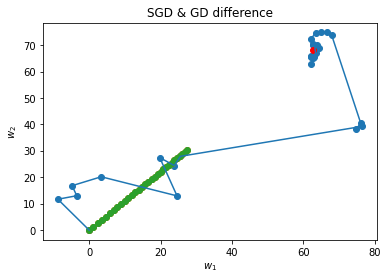

In [322]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.title('SGD & GD difference')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_sgd[:, 0], w_list_sgd[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list_sgd[:, 0], w_list_sgd[:, 1])
plt.scatter(w_list_gd[:, 0], w_list_gd[:, 1])
plt.scatter(w_list_gd[:, 0], w_list_gd[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

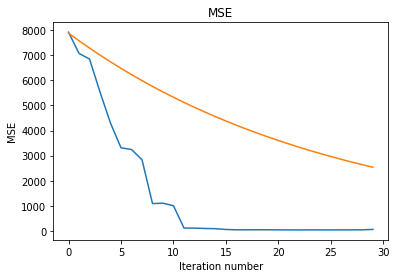

In [323]:
# Визуализация графика ошибок MSE при SGD и GD
plt.plot(range(len(errors_sgd)), errors_sgd)
plt.plot(range(len(errors_gd)), errors_gd)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Сделал специально меньшее количество итераций, чтобы графики были более наглядными.
Стохастический градиентный спуск быстрее, но менее прямолинейко сближается с целевыми коэффциентами. А обычному градиентному спуску даже не хватило итераций чтобы добраться до целевых коэффициентов. 
График ошибок SGD и GD сильно отличаются. Если MSE графи GD ровный и равномерный, то график ошибки SGD имеет более рваный характер.